In [1]:
import pandas as pd
import re as re
import numpy as np

df = pd.read_csv('data/booksummaries.txt',sep='\t', names = ["Wiki ID", "Freebase ID", "Title", "Author", "Publication Date", "Genres", "Summary" ])

In [2]:
df.head()

,Wiki ID,Freebase ID,Title,Author,Publication Date,Genres,Summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


In [3]:
df = df[['Title', 'Genres', 'Summary']]

In [4]:
df.isnull().sum()

Title         0
Genres     3718
Summary       0
dtype: int64

In [5]:
df.dropna(subset=['Genres'], inplace=True)

In [6]:
df.isnull().sum()

Title      0
Genres     0
Summary    0
dtype: int64

In [7]:
df.shape

(12841, 3)

In [8]:
print(df.loc[[0]])

         Title                                             Genres  \
0  Animal Farm  {"/m/016lj8": "Roman \u00e0 clef", "/m/06nbt":...   

                                             Summary  
0   Old Major, the old boar on the Manor Farm, ca...  


In [9]:
word = df['Genres'][0]
print(word)

{"/m/016lj8": "Roman \u00e0 clef", "/m/06nbt": "Satire", "/m/0dwly": "Children's literature", "/m/014dfn": "Speculative fiction", "/m/02xlf": "Fiction"}


In [10]:
df.Genres[0]

'{"/m/016lj8": "Roman \\u00e0 clef", "/m/06nbt": "Satire", "/m/0dwly": "Children\'s literature", "/m/014dfn": "Speculative fiction", "/m/02xlf": "Fiction"}'

In [11]:
type(df.Genres[0])

str

In [12]:
import json
type(json.loads(df['Genres'][0]))

dict

In [13]:
json.loads(df['Genres'][0]).values()

dict_values(['Roman à clef', 'Satire', "Children's literature", 'Speculative fiction', 'Fiction'])

In [14]:
# Create new list for genres
genres = []

# extract genres
for i in df['Genres']: 
  genres.append(list(json.loads(i).values())) 

# add to 'genres' dataframe  
df['Genres'] = genres

In [15]:
# get all genre tags in a list

all_genres = sum(genres,[])
len(set(all_genres))

227

In [16]:
import nltk
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

In [17]:
all_genres_df.head()

,Genre,Count
0,Roman à clef,29
1,Satire,123
2,Children's literature,2122
3,Speculative fiction,4314
4,Fiction,4747


In [18]:
all_genres_df.sort_values(by='Count', ascending = False)

,Genre,Count
4,Fiction,4747
3,Speculative fiction,4314
5,Science Fiction,2870
10,Novel,2463
12,Fantasy,2413
...,...,...
187,Fable,1
188,Bangsian fantasy,1
189,Space western,1
194,Fantastique,1


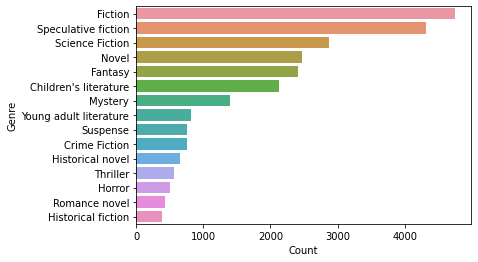

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

g = all_genres_df.nlargest(columns="Count", n = 15) 
plt.figure() 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Genre') 
plt.show()

In [20]:
df.Summary[0][:300]

" Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a philo"

In [21]:
from nltk.corpus import stopwords
def clean_text(text):
    
    # change all letters to lower case
    text = text.lower()
    
    # remove all numbers from text
    text = re.sub(r'\d+', '', text)
    
    # remove all white spaces from text
    text = text.strip()
    
    # remove all punctuation from text
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    return text

In [22]:
import string
df['Summary'] = df['Summary'].apply(lambda x: clean_text(x))

In [23]:
df.Summary[0][:300]

'old major the old boar on the manor farm calls the animals on the farm for a meeting where he compares the humans to parasites and teaches the animals a revolutionary song beasts of england when major dies two young pigs snowball and napoleon assume command and turn his dream into a philosophy the a'

In [24]:
word_freq = df.Summary.str.split(expand=True).stack().value_counts().rename_axis('Word').reset_index(name='Frequency')

In [25]:
word_freq.head()

,Word,Frequency
0,the,397135
1,to,200707
2,and,193331
3,of,155989
4,a,148310


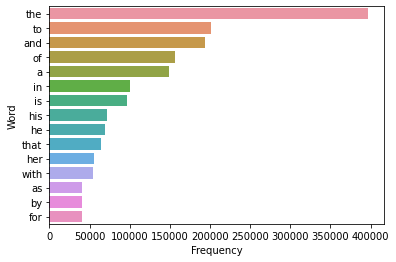

In [26]:
g = word_freq.nlargest(columns="Frequency", n = 15) 
plt.figure() 
ax = sns.barplot(data=g, x= "Frequency", y = "Word") 
ax.set(ylabel = 'Word') 
plt.show()

In [27]:
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    # caching stopwords runs 70x faster according to StackOverflow
    cachedStopWords = stopwords.words("english")   
    
    text_tokens = word_tokenize(text)
    
    # remove all stopwords
    text = [word for word in text_tokens if word not in cachedStopWords]
    text = ' '.join(text)
    
    return text

df['Summary'] = df['Summary'].apply(lambda x: remove_stopwords(x))

In [28]:
df.Summary[0][:300]

'old major old boar manor farm calls animals farm meeting compares humans parasites teaches animals revolutionary song beasts england major dies two young pigs snowball napoleon assume command turn dream philosophy animals revolt drive drunken irresponsible mr jones farm renaming animal farm adopt se'

In [29]:
df.head()

,Title,Genres,Summary
0,Animal Farm,"[Roman à clef, Satire, Children's literature, ...",old major old boar manor farm calls animals fa...
1,A Clockwork Orange,"[Science Fiction, Novella, Speculative fiction...",alex teenager living nearfuture england leads ...
2,The Plague,"[Existentialism, Fiction, Absurdist fiction, N...",text plague divided five parts town oran thous...
4,A Fire Upon the Deep,"[Hard science fiction, Science Fiction, Specul...",novel posits space around milky way divided co...
5,All Quiet on the Western Front,"[War novel, Roman à clef]",book tells story paul bäumer german soldier wh...


In [30]:
new_word_freq = df.Summary.str.split(expand=True).stack().value_counts().rename_axis('Word').reset_index(name='Frequency')

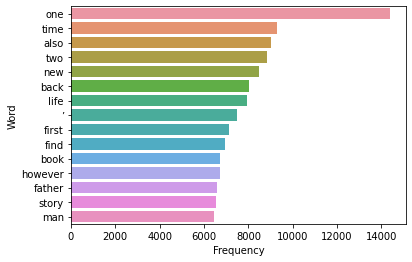

In [31]:
g = new_word_freq.nlargest(columns="Frequency", n = 15) 
plt.figure() 
ax = sns.barplot(data=g, x= "Frequency", y = "Word") 
ax.set(ylabel = 'Word') 
plt.show()

In [32]:
df.head()

,Title,Genres,Summary
0,Animal Farm,"[Roman à clef, Satire, Children's literature, ...",old major old boar manor farm calls animals fa...
1,A Clockwork Orange,"[Science Fiction, Novella, Speculative fiction...",alex teenager living nearfuture england leads ...
2,The Plague,"[Existentialism, Fiction, Absurdist fiction, N...",text plague divided five parts town oran thous...
4,A Fire Upon the Deep,"[Hard science fiction, Science Fiction, Specul...",novel posits space around milky way divided co...
5,All Quiet on the Western Front,"[War novel, Roman à clef]",book tells story paul bäumer german soldier wh...


In [33]:
df.to_csv('data/clean_data.csv', index = False)

In [37]:
new_word_freq.shape

(131292, 2)

In [38]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['Genres'])

# transform target variable
y = multilabel_binarizer.transform(df['Genres'])

In [39]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [87]:
from sklearn.model_selection import train_test_split

# split dataset into training and validation set
x_train, x_test, y_train, y_test = train_test_split(df['Summary'], y, test_size=0.20, random_state=43)

In [51]:
# create TF-IDF features
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [101]:
from keras.utils import to_categorical

y_enc = to_categorical(y)

In [113]:
import keras